In [1]:
import nltk
from nltk.corpus import webtext
nltk.download('webtext')
wt_sentence = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

[nltk_data] Downloading package webtext to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


In [2]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [3]:
webtext.fileids()

['firefox.txt',
 'grail.txt',
 'overheard.txt',
 'pirates.txt',
 'singles.txt',
 'wine.txt']

In [4]:
len(wt_sentence)

1142

In [5]:
len(wt_words)

102457

In [6]:
print(wt_words)

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]


In [7]:
frequency_dist = nltk.FreqDist(wt_words)
frequency_dist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [8]:
sorted_freq_dist = sorted(frequency_dist,key=frequency_dist.__getitem__,reverse=True)
sorted_freq_dist

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab',
 'doesn',
 'after',
 'Firebird',
 'new',
 'work',
 'browser',
 'if',
 'be',
 '0',
 'toolbar',
 'button',
 'bookmarks',
 'dialog',
 'bookmark',
 'as',
 'file',
 'URL',
 'download',
 'crashes',
 'I',
 'no',
 'text',
 'are',
 'or',
 'up',
 'crash',
 'click',
 'tabs',
 'Bookmarks',
 'link',
 '/',
 'firefox',
 'manager',
 '+',
 'using',
 'it',
 'Mozilla',
 'default',
 'error',
 'all',
 'an',
 'clicking',
 's',
 'windows',
 'search',
 'folder',
 ']',
 'Phoenix',
 '1',
 'at',
 'icon',
 'Manager',
 'by',
 'this',
 'site',
 'can',
 'files',
 'Page',
 'fails',
 'causes',
 'use',
 'close',
 '[',
 'opening',
 'Toolbar',
 'Add',
 'has',
 'Bookmark',
 'right',
 'display',
 'down',
 'that',
 'theme',
 'box',
 'Download',
 '9',
 'The',
 'pages',
 'firebird',
 'only',
 'ur

In [10]:
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
large_words

{'Cookie': 22,
 'Manager': 179,
 'allow': 53,
 'sites': 63,
 'that': 145,
 'removed': 21,
 'cookies': 57,
 'future': 4,
 'should': 461,
 'stay': 21,
 'checked': 22,
 'When': 132,
 'full': 38,
 'screen': 101,
 'mode': 51,
 'Pressing': 9,
 'Ctrl': 96,
 'open': 479,
 'browser': 392,
 'when': 1255,
 'only': 139,
 'download': 297,
 'dialog': 330,
 'left': 75,
 'icons': 106,
 'context': 104,
 'menu': 462,
 'called': 16,
 'made': 16,
 'proper': 6,
 'toolbar': 364,
 'given': 15,
 'ability': 25,
 'collapse': 15,
 'expand': 29,
 'Implement': 25,
 'Cocoa': 1,
 'style': 40,
 'customization': 16,
 'ifdefs': 3,
 'MOZ_PHOENIX': 4,
 'customize': 39,
 'small': 45,
 'nightly': 28,
 'builds': 45,
 'tinderboxen': 1,
 'Phoenix': 186,
 'finish': 7,
 'tearing': 1,
 'prefs': 33,
 'pieces': 1,
 'then': 40,
 'make': 47,
 'suck': 3,
 'mozbrowser': 2,
 'script': 21,
 'doesn': 453,
 'start': 124,
 'correct': 17,
 'binary': 8,
 'Need': 47,
 'bookmark': 329,
 'groups': 11,
 'icon': 180,
 'Dropping': 2,
 'palette': 4

In [11]:
frequency_dist = nltk.FreqDist(large_words)
frequency_dist

FreqDist({'when': 1255, 'page': 719, 'with': 680, 'window': 607, 'Firefox': 602, 'does': 594, 'from': 506, 'open': 479, 'menu': 462, 'should': 461, ...})

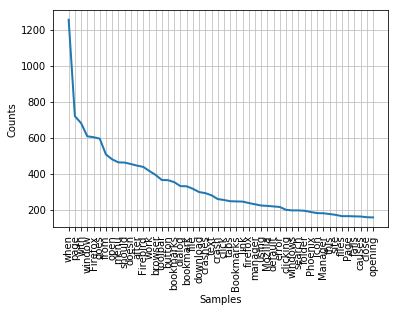

In [112]:
%matplotlib inline
from matplotlib import pyplot as plt

frequency_dist.plot(50,cumulative= False)

In [12]:
values = frequency_dist.values()
k = sorted(values,reverse=True)
k[:20]

[1255,
 719,
 680,
 607,
 602,
 594,
 506,
 479,
 462,
 461,
 453,
 444,
 437,
 414,
 392,
 364,
 363,
 352,
 330,
 329]

In [16]:
!pip install wordcloud




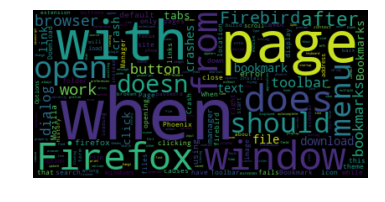

In [17]:
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
import matplotlib.pyplot as plt
plt.imshow(wcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


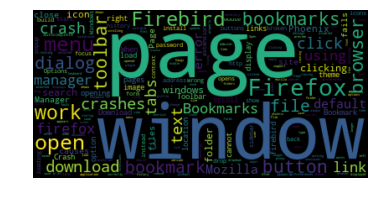

In [18]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
remove_stopwords = dict([(k,v) for k,v in frequency_dist.items() if k not in stop])

frequency_dist = nltk.FreqDist(remove_stopwords)
#frequency_dist
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
import matplotlib.pyplot as plt
plt.imshow(wcloud,interpolation='bilinear')
plt.axis('off')
plt.show()